# Project: US Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This analysis is about Gun sales und background checks in the US. In particular we will try to find trends for the development of gun sales in comparison with census data. 

It attempts to answer the following questions:

1. What census data is most associated with high gun per capita?
2. Which states have had the highest growth in gun registrations?
3. What is the overall trend of gun purchases?


In [53]:
# Import statements for all of the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import my_functions

In [63]:
# This function imports data from an csv file given as an argument and prints out the head 

def csv_ready(variable, filename, separator):
    variable = pd.read_csv(filename, sep=separator)
    return variable.head()

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [64]:
# Display all columns instead of truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [65]:
# Using csv_ready function (see above) to import and print gun_data from csv

csv_ready(gun_data, 'gun-data.csv', ';')

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [62]:
# Show gun_data Infos to see the column names and data types
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

In [5]:
# Have a look at some statistics to get a better understanding of the data
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,10545.000000,10544.000000,5115.000000,2200.000000,2145.000000,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,29.612727,7.557576,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,783.467053,952.144809,4.574641,81.943020,22.097046,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,39.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,561.000000,872.000000,2.000000,16.000000,4.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,79.000000,603.000000,168.000000,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [67]:
# Using csv_ready function (see above) to import and print census-dat from csv

csv_ready(census, 'u.s.-census-data.csv', ',')

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2016)",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, (V2016)",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [7]:
# Show census Infos to see the column names
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

### Data Cleaning

In [8]:
# Set column names in census data lowercase
census.columns = census.columns.str.lower()

In [9]:
# Drop not needed rows and columns and show data
filtered_census = census.iloc[0:4,:].drop(['fact note'], axis=1).drop([1,2], axis=0)
filtered_census

,fact,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,georgia,hawaii,idaho,illinois,indiana,iowa,kansas,kentucky,louisiana,maine,maryland,massachusetts,michigan,minnesota,mississippi,missouri,montana,nebraska,nevada,new hampshire,new jersey,new mexico,new york,north carolina,north dakota,ohio,oklahoma,oregon,pennsylvania,rhode island,south carolina,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"


In [10]:
# Transpose dataframe and remove index on fact
filtered_census.set_index('fact',inplace=True)
census_T = filtered_census.T.reset_index()

In [11]:
# Rename column names and show data
census_T.columns.values[0] = 'state'
census_T.columns.values[1] = 'population_2016'
census_T.columns.values[2] = 'population_2010'

census_T.head()

fact,state,population_2016,population_2010
0,alabama,"4,863,300","4,779,736"
1,alaska,"741,894","710,231"
2,arizona,"6,931,071","6,392,017"
3,arkansas,"2,988,248","2,915,918"
4,california,"39,250,017","37,253,956"


In [12]:
# Show data types
census_T.dtypes

fact
state              object
population_2016    object
population_2010    object
dtype: object

In [13]:
# Remove comma from columns 'population_2016' and 'population_2010'
census_T['population_2016'] = census_T['population_2016'].str.replace(',', '')
census_T['population_2010'] = census_T['population_2010'].str.replace(',', '')

# Convert columns 'population_2016' and 'population_2010' into integer
census_T['population_2016'] = census_T['population_2016'].astype(int)
census_T['population_2010'] = census_T['population_2010'].astype(int)

In [14]:
# Convert gun_data column "month" to datetime format
gun_data['month'] = pd.to_datetime(gun_data['month'])

# Extract year from datetime column
gun_data['year'] = gun_data['month'].dt.year 

In [15]:
# Set gun data column 'state' lowercase
gun_data['state'] = gun_data['state'].str.lower()

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: What census data is most associated with high gun per capita?

In [16]:
# Get supset of data for 2010 and 2016
gun_data_2010 = gun_data[gun_data['year'] == 2010]
gun_data_2016 = gun_data[gun_data['year'] == 2016]

In [17]:
# Show gun data 2010
gun_data_2010.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
4455,2010-12-01,alabama,413.0,NaN,13978.0,24298.0,152.0,569,0.0,6.0,20.0,0.0,1673.0,2154.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43266,2010


In [18]:
# Group by state and total for 2010 and 2016 and reset index and show data for 2016
gun_total_2010 = gun_data_2010.groupby(['state'])['totals'].sum().reset_index()
gun_total_2016 = gun_data_2016.groupby(['state'])['totals'].sum().reset_index()
gun_total_2016.head()

,state,totals
0,alabama,616947
1,alaska,87647
2,arizona,416279
3,arkansas,266014
4,california,2377167


In [19]:
# Show data for 2010
gun_total_2010.head()

,state,totals
0,alabama,308607
1,alaska,65909
2,arizona,206050
3,arkansas,191448
4,california,816399


In [20]:
# Rename totals in subsets 2010 and 2016
gun_total_2010.rename(columns = {'totals':'totals_2010'}, inplace=True)
gun_total_2016.rename(columns = {'totals':'totals_2016'}, inplace=True)

In [21]:
# Merge 2010 and 2016 data sets
gun_total = gun_total_2010.merge(gun_total_2016, on='state', how='inner')

# Merge gun and census data
final_result = gun_total.merge(census_T, on='state', how='inner')

# Show results
final_result.head()

,state,totals_2010,totals_2016,population_2016,population_2010
0,alabama,308607,616947,4863300,4779736
1,alaska,65909,87647,741894,710231
2,arizona,206050,416279,6931071,6392017
3,arkansas,191448,266014,2988248,2915918
4,california,816399,2377167,39250017,37253956


In [22]:
# Checks dtype of final result dataset
final_result.dtypes

state              object
totals_2010         int64
totals_2016         int64
population_2016     int64
population_2010     int64
dtype: object

In [23]:
# Calculate gun per capita for 2010 and 2016
final_result['gun_capita_2010'] = final_result['totals_2010'] / final_result['population_2010']
final_result['gun_capita_2016'] = final_result['totals_2016'] / final_result['population_2016']

# Show final results
final_result.head(3)

,state,totals_2010,totals_2016,population_2016,population_2010,gun_capita_2010,gun_capita_2016
0,alabama,308607,616947,4863300,4779736,0.064566,0.126858
1,alaska,65909,87647,741894,710231,0.092799,0.118140
2,arizona,206050,416279,6931071,6392017,0.032236,0.060060


In [24]:
# Filter and sumerize gun capita for 2010 and 2016
filtered_result = final_result.iloc[:,5:7].sum(axis=0).to_frame(name='Sum')

# Show filtered results
filtered_result

,Sum
gun_capita_2010,3.006337
gun_capita_2016,4.884755


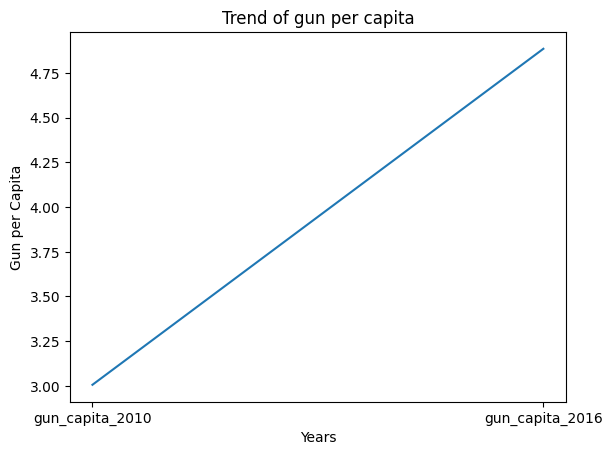

In [25]:
# Visualization trend of gun capita between 2010 and 2016
filtered_result['Sum'].plot()

plt.xlabel('Years')
plt.ylabel('Gun per Capita')
plt.title('Trend of gun per capita')
plt.xticks(range(len(filtered_result.index)), filtered_result.index)

plt.show()



### Question 2: Which states have had the highest growth in gun registrations?

In [26]:
# Getting Subset for states and totals
growth_states = final_result.iloc[:,0:3]
growth_states.head()

,state,totals_2010,totals_2016
0,alabama,308607,616947
1,alaska,65909,87647
2,arizona,206050,416279
3,arkansas,191448,266014
4,california,816399,2377167


In [27]:
# Calcuate gun growth rates per state
growth_states['growth_rate'] =  round(((growth_states['totals_2016'] - growth_states['totals_2010']) / growth_states['totals_2010']), 3) *100

growth_states.head()

,state,totals_2010,totals_2016,growth_rate
0,alabama,308607,616947,99.9
1,alaska,65909,87647,33.0
2,arizona,206050,416279,102.0
3,arkansas,191448,266014,38.9
4,california,816399,2377167,191.2


In [28]:
# Filter for state with highest growth rate
max = growth_states['growth_rate'].max()
max_growth = growth_states.loc[growth_states['growth_rate'] == max]
max_growth

,state,totals_2010,totals_2016,growth_rate
13,indiana,345650,1436725,315.7


In [29]:
# Filter for state with lowest growth rate
min = growth_states['growth_rate'].min()
min_growth = growth_states.loc[growth_states['growth_rate'] == min]
min_growth

,state,totals_2010,totals_2016,growth_rate
43,utah,553134,294907,-46.7


### Question 3: What is the overall trend of gun purchases?

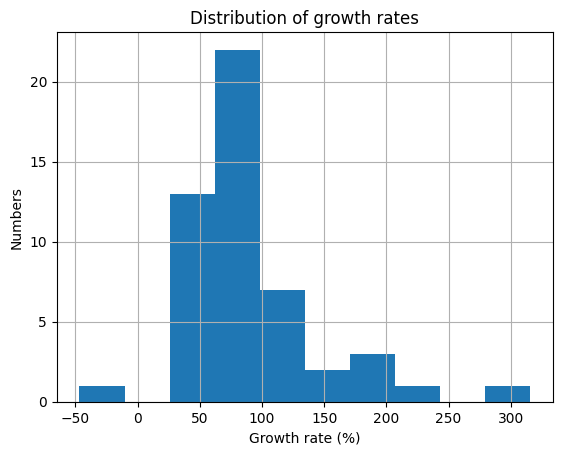

In [30]:
# Visualize growth rate data to see the distribution 
growth_states['growth_rate'].hist() 

plt.title('Distribution of growth rates')

plt.xlabel('Growth rate (%)')
plt.ylabel('Numbers')
plt.show()

**Drawing conclusion from the distribution of the histogram:**

The distribution of the growth rates amoung all states is skewed to the right with some outliers to the right and to the left. Therefore I choose the median to calculate the center of the growth rate data in the next step.

In [31]:
# Determine the median of growth rate fo all states
median_states = round(growth_states['growth_rate'].median(),2)
print('The center of growth rates for all states:', median_states,'%')

The center of growth rates for all states: 76.3 %


<a id='conclusions'></a>
## Conclusions

With this analysis I focused on answering the following questions:
1. What census data is most associated with high gun per capita?
2. Which states have had the highest growth in gun registrations?
3. What is the overall trend of gun purchases?

To answer the question I analyzed gun data and census data for the years 2010 and 2016. With some data cleaning I prepared the data in a way to best answer the questions afterwards.

**My findings:**

**Question 1:** What census data is most associated with high gun per capita?

Data shows that gun per capita 2016 raised 1,9 to 4,9 gun per capita compared to 3 gun per capita in 2010. There seems to be a trend for people in the US to by more guns in 2016 than they did 2010.

**Question 2:** Which states have had the highest growth in gun registrations?

After calculating the growth rate for all states data shows that Indiana with an overal growth rate of 315,7% has the highest growth in gun registration amoung all states. 

**Question 3:** What is the overall trend of gun purchases?

Due to the fact that only Utah sold less guns 2016 than 2010, all other states sold more guns in 2016 that they did in 2010. The growth rate increased on average about 76,3% amoung all states. Therefore the overall trend seems to be positiv. Which means there were more guns sold 2016 than in 2010.  

**Limitations and additional analysis:**

The trend is limited to data from 2010 to 2016 and refleced only this period of time. 2016 data includes serveral estimations (e.g. for population). To get a better understanding of recent trends the newest 2020 census data could be used for further analysis. 



